<a href="https://colab.research.google.com/github/jambinoid/perceptron/blob/master/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Самостоятельное задание 1.
##Написать аналогичный алгоритм для решения операции логического И (&).

Импортируем библиотеку numpy

In [ ]:
import numpy as np

Реализация простейшего перцептрона с помощью ООП

In [ ]:
class SimplePerceptron():
    # Пороговая функция активации
    activate = lambda self,sum: 0 if sum < 0 else 1

    def __init__(self, n_entries):
        # Задаем начальные веса
        self.weights = np.random.rand(n_entries + 1)

    # Функция обучения модели
    def fit(self, data, expected_values, learning_rate):
        # Добавляем смещение
        data = np.append(data, np.ones((data.shape[0], 1), dtype=data.dtype), axis=1)
        # Обучаем модель, изменяя веса
        for x, expected in zip(data, expected_values):
            error = expected - self.activate(np.dot(x, self.weights))
            # сработает с массивами numpy, но не сработает со списками
            self.weights += learning_rate * error * x
        print(self.weights)

    # Функция предсказания
    def predict(self, data):
        # Добавляем смещение
        data = np.append(data, np.ones((data.shape[0], 1), dtype=data.dtype), axis=1)
        # Возвращаем предсказанные обученной моделью значения
        return np.array([self.activate(np.dot(x, self.weights)) for x in data])

Подготавливаем выборку

In [ ]:
X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
print(X)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]


In [ ]:
Y = np.array([0, 0, 0, 1])
print(Y)

[0 0 0 1]


Создаем и обучаем модель

In [ ]:
N = 200
lr = 2e-1
indices = [np.random.randint(X.shape[0]) for i in range(N)]
training_data = np.take(X, indices, axis=0)
training_values = np.take(Y, indices)

model = SimplePerceptron(n_entries=X.shape[1])
model.fit(training_data, training_values, lr)

[ 0.20097789  0.34311622 -0.45045559]


Предсказываем значения

In [ ]:
prediction = model.predict(X)
# Вывод результата тренировки
for x, y in zip(X, prediction):
    print("{} -> {}".format(x, y))

[0 0] -> 0
[1 0] -> 0
[0 1] -> 0
[1 1] -> 1


#Самостоятельное задание 2.
##Написать алгоритм для обучения перцептрона возводить в квадрат.
*то есть на вход будет подаваться число S и на выходе должно получиться Sˆ2.

Импортируем библиотеку numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Реализация многослойного перцептрона с помощью ООП (здесь будем использовать один скрытый слой)

In [ ]:
# Однослойный перцептрон - всего лишь линейный классификатор
# Двухслойный перцептрон может аппроксимировать многие непрерывные функции
class MultiPerceptron():
    # Вариант с одним выходным нейроном
    def __init__(self, n_entries, n_neurons=3):
        # Задаем начальные веса (должен быть многомерный массив, для каждого слоя свои веса)
        self.weights = [
                        2 * (np.random.rand(n_neurons, n_entries + 1) - 0.5),  # набор весов первого слоя с двумя нейронами
                        np.random.rand(1, n_neurons),  # набор весов выходного слоя с одним нейроном
        ]
        print('Kernel:')
        for weights in self.weights:
            print()
            print('    ', end='')
            for w in weights:
                print(w, end=' ')
            print()
        self.era_id = 0

    # Изменяем веса
    def fit(self, data, expected_values, learning_rate, print_info=True):
        for x, expected in zip(data, expected_values):
            # История входов нейронов
            z = []
            # История выходов нейронов (для производной)
            y = []
            # Проходим по скрытым слоям
            for k in range(len(self.weights) - 1):
                # Выход слоя
                y.append([])
                # Добавляем смещение
                x = np.append(x, 1)
                # Добавляем вход в историю
                z.append(x)
                # Проходим по нейронам скрытого слоя k
                for i in range(len(self.weights[k])):
                    # Выход нейрона i
                    y[k].append(max((0, np.dot(x, self.weights[k][i]))))
                # Присваиваем x выход слоя, чтобы с этими данными мог работать следующий слой
                x = np.array(y[k])
            # Находим разность (ошибка = 1/2 * div ** 2, но она не нужна в обновлении весов)
            # Добавляем вход в историю
            z.append(x)
            y.append([np.dot(x, self.weights[-1][0])])
            div = expected - y[-1][-1]
            # Изменяем веса с помощью обратного прохода
            # Проходим по нейронам в выходном слое (один нейрон в нашем случае)
            delta = [[]]
            # Проходим по весам нейрона 0
            for j in range(len(self.weights[-1][0])):
                delta[0].append(-div)
                self.weights[-1][0][j] -= learning_rate * delta[0][j] * z[-1][0]
            # Чтобы пересчитать веса предыдущего нейрона на основе весов следующих нейронов
            delta_next = np.array(delta)
            # Проходим по скрытым слоям в обратном направлении
            for k in range(len(self.weights) - 2, -1, -1):
                delta = []
                # Проходим по нейронам в скрытом слое k
                for i in range(len(self.weights[k])):
                    if y[k][i] != 0:
                        delta.append([])
                        # Проходим по весам нейрона i
                        for j in range(len(self.weights[k][i])):
                            # Обновляем вес j нерона i скрытого слоя k
                                delta[i].append(np.sum(delta_next * self.weights[k + 1]))
                                self.weights[k][i][j] -= learning_rate * delta[i][j] * z[k][j]
                    else:
                        delta.append(np.zeros(len(self.weights[k][i])))
                    # Чтобы пересчитать веса предыдущего нейрона на основе весов следующих нейронов
                delta_next = np.array(delta)
        self.era_id += 1
        if print_info:
            print('Kernel:')
            for weights in self.weights:
                print('    ', end='')
                for w in weights:
                    print(w, end=' ')
                print()
            print(f'Era: {self.era_id}')

    # Функция предсказания
    def predict(self, data):
        res = []
        for x in data:
            # Проходим по скрытым слоям
            for k in range(len(self.weights) - 1):
                # Выход слоя
                y = []
                # Добавляем смещение
                x = np.append(x, 1)
                # Проходим по нейронам скрытого слоя
                for i in range(len(self.weights[k])):
                    # Выход нейрона i
                    y.append(max((0, np.dot(x, self.weights[k][i]))))
                # Присваиваем x выход слоя, чтобы с этими данными мог работать следующий слой
                x = np.array(y)
            res.append(np.dot(x, self.weights[-1][-1]))

        return np.array(res)

Обучающая выборка

In [ ]:
N = 10
training_data = np.arange(-N, N, 0.02)
training_values = np.square(training_data)
L = len(training_data)
print(L)

1000


### Создаем модели

С тремя нейронами

In [ ]:
model = MultiPerceptron(n_entries=1, n_neurons=3)

Kernel:

    [-0.82454689 -0.21881619] [ 0.70235267 -0.84913184] [ 0.52100702 -0.18447532] 

    [0.36923043 0.3460208  0.65563366] 


Обучение модели

Kernel:
    [-3.32528092  0.08034671] [ 2.17592444 -0.70375525] [ 1.99454621 -0.03927264] 
    [1.81744524 1.79423561 2.10384848] 
Era: 1
Kernel:
    [-3.67083028e+00  1.34523195e-03] [ 1.92621345 -0.85471277] [ 1.74466546 -0.19081293] 
    [2.01569723 1.99248761 2.30210047] 
Era: 2
Kernel:
    [-3.66521063 -0.14031656] [ 1.97907042 -0.95557661] [ 1.79728431 -0.29240081] 
    [2.01235555 1.98914592 2.29875878] 
Era: 3
Kernel:
    [-3.75869231 -0.25903041] [ 1.92373298 -1.07848706] [ 1.74169039 -0.41593372] 
    [2.06858225 2.04537262 2.35498548] 
Era: 4
Kernel:
    [-3.71768812 -0.38945748] [ 1.92700013 -1.18885877] [ 1.74474773 -0.52671475] 
    [2.04972546 2.02651584 2.3361287 ] 
Era: 5
Kernel:
    [-3.69686049 -0.51001543] [ 1.95358798 -1.30077964] [ 1.77114454 -0.63899183] 
    [2.04442706 2.02121744 2.3308303 ] 
Era: 6
Kernel:
    [-3.71869202 -0.6381073 ] [ 1.93949192 -1.40549389] [ 1.75692286 -0.74390416] 
    [2.06671899 2.04350937 2.35312223] 
Era: 7
Kernel:
    [-3.71354611 -

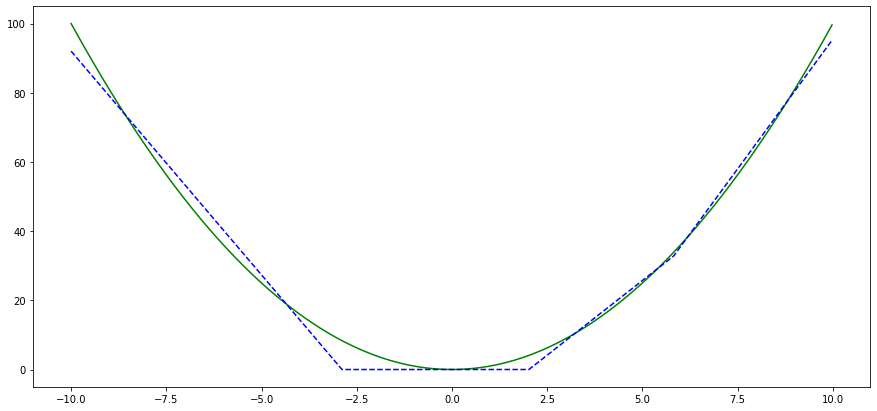

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
for i in range(500):
    rand_indices = np.random.randint(L,  size=L)
    t_data = training_data[rand_indices]
    t_values = training_values[rand_indices]
    model.fit(t_data, t_values, learning_rate=1e-5, print_info=True)

true_values = np.square(training_data)
pred_values = model.predict(training_data)

ax.plot(training_data, true_values, c='green')
ax.plot(training_data, pred_values, c='blue', linestyle='--')
fig.show()

С семью нейронами

In [ ]:
model = MultiPerceptron(n_entries=1, n_neurons=7)

Kernel:

    [-0.27682467  0.51314002] [ 0.38359711 -0.34491559] [-0.29061856  0.71870421] [0.32037621 0.90827391] [-0.63859833 -0.74107205] [-0.94192516 -0.14725099] [ 0.38202414 -0.32824366] 

    [0.68529599 0.9850152  0.63274155 0.13981747 0.1456219  0.780851
 0.60653721] 


Обучение модели

Kernel:
    [-1.79247509  0.61820858] [ 2.63022579 -0.13218307] [-1.80642236  0.82332873] [2.56855197 1.11567562] [-2.15434131 -0.6312931 ] [-2.45711622 -0.04000257] [ 2.62865281 -0.11551113] 
    [1.00137901 1.30109823 0.94882457 0.4559005  0.46170492 1.09693402
 0.92262023] 
Era: 1
Kernel:
    [-1.84227433  0.49281095] [ 2.76705013 -0.24148862] [-1.85638577  0.69746798] [2.70602094 1.00276169] [-2.20437866 -0.7521353 ] [-2.50667758 -0.16336686] [ 2.76547716 -0.22481668] 
    [1.00330358 1.3030228  0.95074914 0.45782507 0.46362949 1.09885859
 0.9245448 ] 
Era: 2
Kernel:
    [-1.87705919  0.36519023] [ 2.80186327 -0.35992444] [-1.89131496  0.56942424] [2.74120604 0.88180515] [-2.23955911 -0.87630287] [-2.54135566 -0.28954793] [ 2.8002903 -0.3432525] 
    [1.00346495 1.30318416 0.9509105  0.45798643 0.46379086 1.09901995
 0.92470617] 
Era: 3
Kernel:
    [-1.91408799  0.23648425] [ 2.79570134 -0.48088529] [-1.92841588  0.44033168] [2.73531004 0.75882331] [-2.2769993  -1.00262417] [-2.578

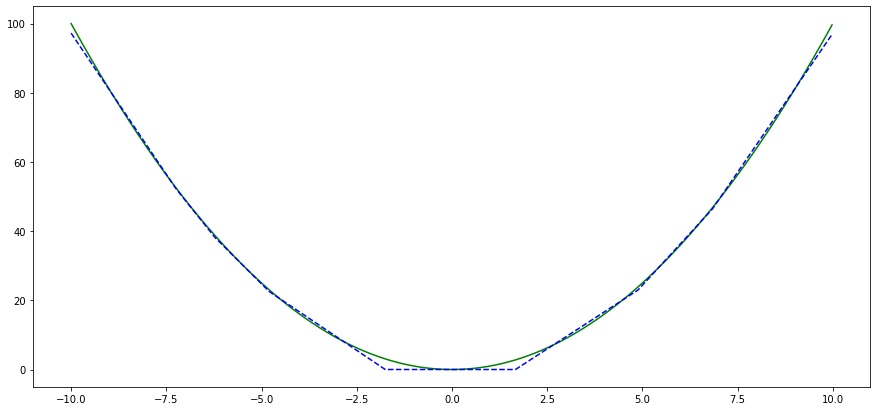

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
for i in range(500):
    rand_indices = np.random.randint(L,  size=L)
    t_data = training_data[rand_indices]
    t_values = training_values[rand_indices]
    model.fit(t_data, t_values, learning_rate=1e-5, print_info=True)

true_values = np.square(training_data)
pred_values = model.predict(training_data)

ax.plot(training_data, true_values, c='green')
ax.plot(training_data, pred_values, c='blue', linestyle='--')
fig.show()

С пятнадцатью нейронами

In [ ]:
model = MultiPerceptron(n_entries=1, n_neurons=15)

Kernel:

    [0.92685862 0.50101429] [-0.74364342 -0.24178517] [ 0.58423867 -0.92520895] [ 0.23267518 -0.81209912] [-0.55844759 -0.72325202] [-0.39059561  0.02503374] [-0.90964594 -0.92590945] [ 0.91550955 -0.11088912] [-0.44873337  0.62542686] [ 0.85810055 -0.04068033] [-0.81940058 -0.55301956] [ 0.22331922 -0.78613882] [0.83881497 0.67225379] [0.35599222 0.5443501 ] [-0.90975246  0.12504272] 

    [3.97456278e-02 7.76544013e-01 8.77937199e-01 9.53702651e-01
 3.92439641e-02 1.40579831e-01 8.86385025e-02 8.71997862e-01
 6.00846733e-01 4.81794838e-01 2.05463188e-04 3.70049480e-01
 6.46312612e-01 4.95987873e-01 2.48403434e-01] 


Обучение модели

Kernel:
    [1.65067107 0.44477097] [-2.8345498  -0.10047823] [ 1.31086208 -0.97214703] [ 0.96178965 -0.85628994] [-2.649735   -0.58007257] [-2.48153621  0.16565393] [-3.00095541 -0.78245857] [ 1.63899945 -0.16476431] [-2.54041488  0.76354482] [ 1.58157704 -0.09494753] [-2.91045261 -0.41069847] [ 0.95243369 -0.83032964] [1.56289289 0.61541384] [1.08082694 0.48615063] [-3.00072289  0.2654144 ] 
    [0.157228   0.89402638 0.99541957 1.07118502 0.15672633 0.2580622
 0.20612087 0.98948023 0.7183291  0.5992772  0.11768783 0.48753185
 0.76379498 0.61347024 0.3658858 ] 
Era: 1
Kernel:
    [1.74760101 0.29211787] [-2.75269621 -0.28663631] [ 1.41111643 -1.11564457] [ 1.06288189 -0.99880747] [-2.56817143 -0.76460454] [-2.39966367 -0.0212694 ] [-2.91944805 -0.96678978] [ 1.73575927 -0.31506817] [-2.45865307  0.57582631] [ 1.67831987 -0.24534578] [-2.82873206 -0.59591291] [ 1.05352592 -0.97284717] [1.66023879 0.46139839] [1.17838951 0.33160677] [-2.91885484  0.07837869] 
    [0.1682572  0.90505559

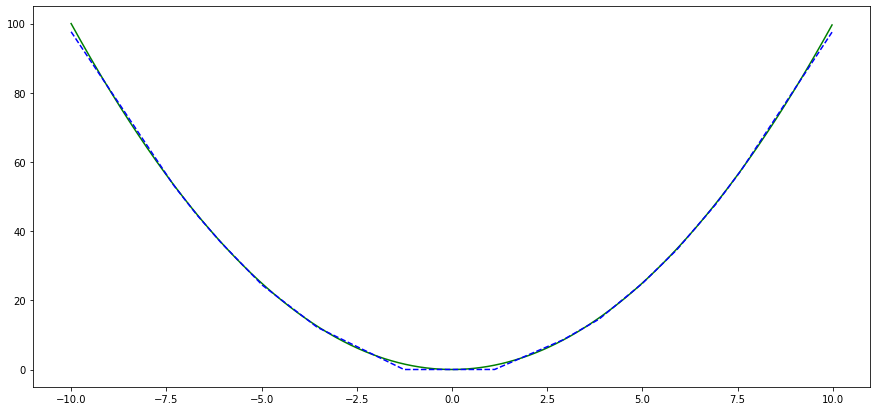

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
for i in range(500):
    rand_indices = np.random.randint(L,  size=L)
    t_data = training_data[rand_indices]
    t_values = training_values[rand_indices]
    model.fit(t_data, t_values, learning_rate=1e-5, print_info=True)

true_values = np.square(training_data)
pred_values = model.predict(training_data)

ax.plot(training_data, true_values, c='green')
ax.plot(training_data, pred_values, c='blue', linestyle='--')
fig.show()

С тридцатью нейронами

In [ ]:
model = MultiPerceptron(n_entries=1, n_neurons=30)

Kernel:

    [0.97529644 0.92950193] [-0.73418917 -0.8200732 ] [0.67188099 0.56946733] [-0.15987857 -0.42438142] [-0.92369781 -0.72503301] [-0.18126425  0.45727187] [0.31955951 0.03844712] [-0.80965975  0.00663959] [-0.49330848 -0.88499687] [0.13622021 0.62422843] [0.8121699  0.53903583] [-0.44275121  0.37198845] [0.36978079 0.47861283] [-0.1213361  -0.86452478] [0.57785016 0.74524218] [-0.5871194  -0.94459663] [ 0.54038128 -0.83593964] [-0.01106359  0.0485098 ] [ 0.46857758 -0.69060761] [0.92590043 0.39187839] [-0.15869908 -0.92968749] [-0.49392602  0.41977515] [-0.0365389  -0.02858107] [-0.3792016   0.67942658] [0.32469166 0.23896561] [ 0.70092821 -0.47451608] [0.0835978  0.36146363] [0.3541246 0.2834229] [-0.03896857  0.30113874] [0.56838679 0.36197162] 

    [0.77784983 0.01574021 0.26479053 0.712081   0.87089773 0.00362457
 0.08547486 0.36292306 0.47800754 0.88525762 0.82573436 0.44796495
 0.74693909 0.28473179 0.07976879 0.29933867 0.7304782  0.23351014
 0.04917683 0.57098361 0.5

Обучение модели

Kernel:
    [1.34913122 0.65474902] [-1.66482152 -0.92594979] [1.04373802 0.29834364] [-1.08998747 -0.5316499 ] [-1.85305329 -0.83343633] [-1.11816685  0.32212421] [ 0.68953265 -0.22292732] [-1.73727532 -0.10970042] [-1.42506485 -0.98918466] [0.51488407 0.34432167] [1.1834039  0.26934581] [-1.37289907  0.24402082] [0.74249347 0.20600736] [-1.06034471 -0.96235057] [0.95168495 0.47048927] [-1.51887577 -1.04878441] [ 0.93875814 -1.05164765] [-0.94329976 -0.07363799] [ 0.85906181 -0.91435156] [1.2963489  0.12456892] [-1.09822556 -1.02693787] [-1.42407388  0.29180752] [-0.96417003 -0.14466181] [-1.31627846  0.5415586 ] [ 0.69500936 -0.02712212] [ 1.07526422 -0.71992302] [0.45672835 0.08848124] [0.72467617 0.01628123] [-0.85521848  0.1770032 ] [0.93895244 0.09427156] 
    [0.79006231 0.02795269 0.27700301 0.72429348 0.8831102  0.01583705
 0.09768734 0.37513554 0.49022002 0.8974701  0.83794684 0.46017743
 0.75915157 0.29694427 0.09198127 0.31155115 0.74269068 0.24572262
 0.06138931 0.58319609

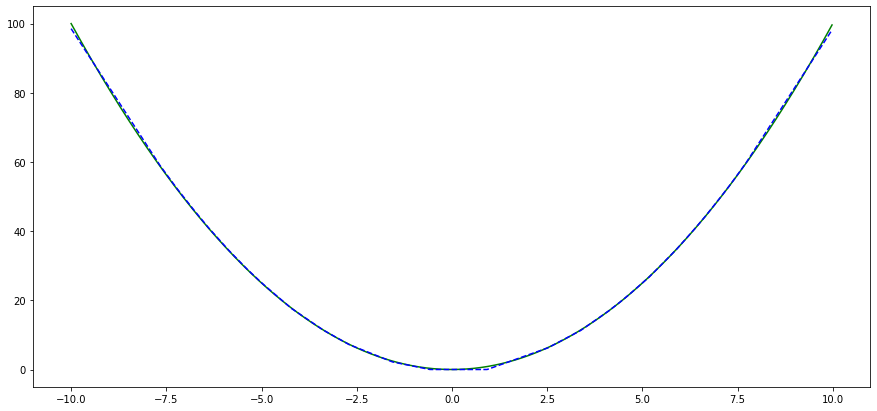

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
for i in range(500):
    rand_indices = np.random.randint(L,  size=L)
    t_data = training_data[rand_indices]
    t_values = training_values[rand_indices]
    model.fit(t_data, t_values, learning_rate=1e-5, print_info=True)

true_values = np.square(training_data)
pred_values = model.predict(training_data)

ax.plot(training_data, true_values, c='green')
ax.plot(training_data, pred_values, c='blue', linestyle='--')
fig.show()